## Step 1 Construct features using NLTK

In [147]:
import nltk
from nltk.corpus import stopwords
import string

import json


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1025.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}


In [148]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [149]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [150]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [151]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [152]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [153]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [154]:
def getAverageSentenceLength(words_all, sents):
    
    return len(words_all)/len(sents)


In [155]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [156]:
def getNumberOfPronoun(sentences):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
    for s in sentences:        
        for p in pronouns:
            count += s.count(p)
    
    return count

In [157]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [158]:
def getNumberOfConjunction(sents):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        for c in conjunctions:
            count += s.count(c)
    
    return count

In [159]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division

# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(words_all, sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(sentences)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(sentences)/normalizer)
        

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

223


,DisLegomena,HapaxLegomena,averageSentenceLength,numberOfConjunction,numberOfPronoun,numberOfSentences,numberUniqueWords
act,,,,,,,
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT IV.,0.037037,0.375661,12.600000,0.132275,0.121693,15,0.423280
THE MERRY WIVES OF WINDSOR ACT V.,0.030271,0.137423,11.665625,0.131262,0.180284,320,0.206268
KING RICHARD III ACT IV.,0.025569,0.090466,11.381011,0.121127,0.210076,811,0.153846
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT II.",0.027211,0.107243,10.849493,0.144458,0.196479,691,0.170468
KING RICHARD III ACT III,0.027092,0.087016,12.848083,0.133165,0.214901,678,0.149466


In [160]:
# Filter out wierd acts, e.g. the beginning of a play

df = df[df['averageSentenceLength'] < 30]
df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
        'averageSentenceLength', 'numberOfPronoun', 'numberOfConjunction']]

/Users/binyan/Python/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


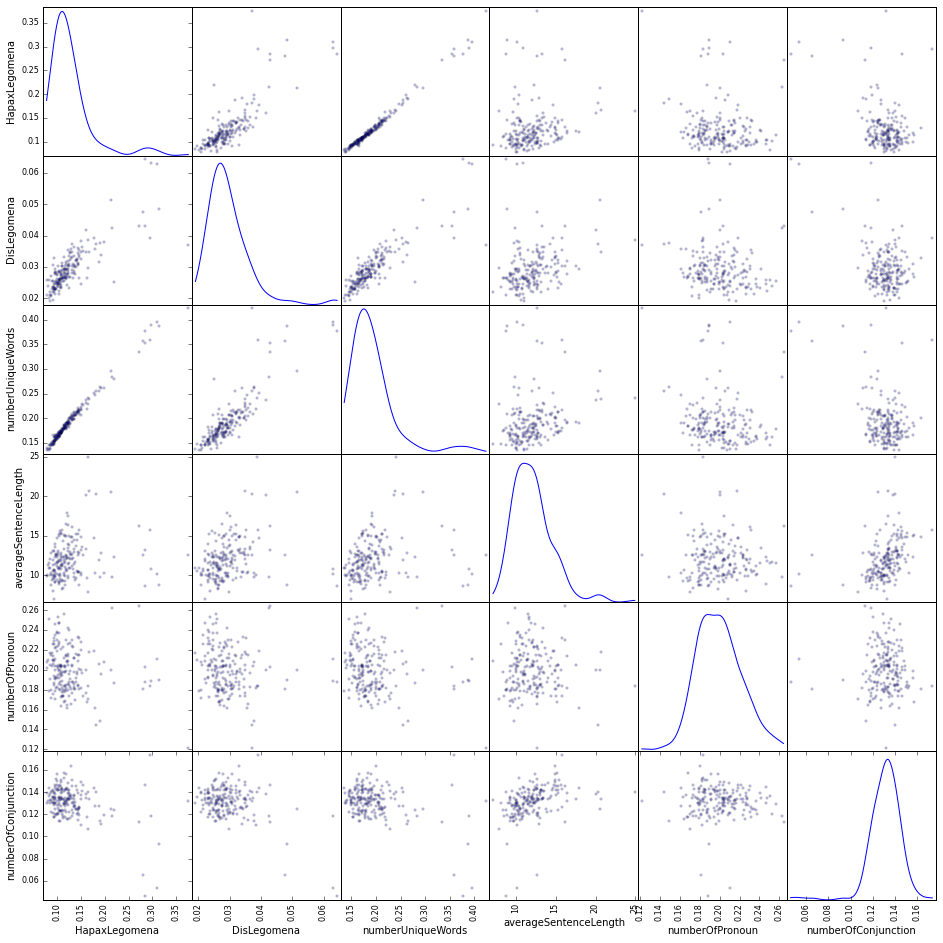

In [161]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

## Step 2 Construct n-grams using sklearn

In [162]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [163]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np

In [164]:
# excluding stop words, n-grams is an input
def getTfidf(ngram_range):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X_counts = count_vect.fit_transform(text)

    tfidf_transformer = TfidfTransformer(use_idf=True).fit(X_counts)
    X_tfidf = tfidf_transformer.transform(X_counts)
    return X_tfidf

In [165]:
randomState = np.random.seed(1)

def getSVD(X_tfidf, n_components):
    
    svd = TruncatedSVD(n_components = n_components, random_state = randomState)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    X = lsa.fit_transform(X_tfidf)

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    
    return X



In [166]:
# Features from n-grams, use fewer components
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 6)
df_ngrams = pd.DataFrame(data=X, index = title)
df_ngrams.head()

Explained variance of the SVD step: 3%


,0,1,2,3,4,5
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT IV.,0.119007,0.586906,0.228650,-0.220366,0.213600,0.703500
THE MERRY WIVES OF WINDSOR ACT V.,0.313966,-0.249190,-0.171014,0.890423,0.040887,-0.124737
KING RICHARD III ACT IV.,0.262623,-0.267659,-0.376572,-0.162470,0.828145,-0.073222
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT II.",0.432689,-0.269438,-0.400303,-0.684276,0.046832,0.330930
KING RICHARD III ACT III,0.406725,-0.077630,-0.367264,-0.056850,-0.151457,0.817003


## Step 3 Combine n-grams and other features

In [167]:
# Merge all features
df_all = df.join(df_ngrams)
df_all.head()

,HapaxLegomena,DisLegomena,numberUniqueWords,averageSentenceLength,numberOfPronoun,numberOfConjunction,0,1,2,3,4,5
act,,,,,,,,,,,,
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT IV.,0.375661,0.037037,0.423280,12.600000,0.121693,0.132275,0.119007,0.586906,0.228650,-0.220366,0.213600,0.703500
THE MERRY WIVES OF WINDSOR ACT V.,0.137423,0.030271,0.206268,11.665625,0.180284,0.131262,0.313966,-0.249190,-0.171014,0.890423,0.040887,-0.124737
KING RICHARD III ACT IV.,0.090466,0.025569,0.153846,11.381011,0.210076,0.121127,0.262623,-0.267659,-0.376572,-0.162470,0.828145,-0.073222
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT II.",0.107243,0.027211,0.170468,10.849493,0.196479,0.144458,0.432689,-0.269438,-0.400303,-0.684276,0.046832,0.330930
KING RICHARD III ACT III,0.087016,0.027092,0.149466,12.848083,0.214901,0.133165,0.406725,-0.077630,-0.367264,-0.056850,-0.151457,0.817003


## Step 4 Clustering

In [168]:
def clusterDocuments(X, n_clusters):

    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=5, random_state = randomState)
    km.fit_predict(X)    
    return km.labels_

def printClusters(labels):
    for i in set(labels):
        index = np.squeeze(np.argwhere(labels == i)).tolist()
        print(index)
    
        print(np.array(title)[index])
        print('\n')

# Cluster only using n-grams as features
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 20)
labels = clusterDocuments(X, n_clusters = 20)
printClusters(labels)

Explained variance of the SVD step: 11%
[39, 59, 70, 74, 94, 103, 104, 161, 162, 165]
['THE TWO GENTLEMEN OF VERONA ACT V. '
 'THE TRAGEDY OF ROMEO AND JULIET ACT V. ' 'CYMBELINE ACT IV.'
 'THE TRAGEDY OF ROMEO AND JULIET ACT III'
 'THE TRAGEDY OF TITUS ANDRONICUS ACT IV.'
 "A MIDSUMMER NIGHT'S DREAM ACT I. "
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT IV.'
 'THE TRAGEDY OF KING LEAR ACT II.'
 'THE TRAGEDY OF ROMEO AND JULIET ACT II.'
 'THE FIRST PART OF HENRY THE SIXTH ACT II.']


[19, 35, 56, 69, 90, 129, 135, 139, 145, 180, 184]
['KING HENRY THE EIGHTH ACT I. ' 'MEASURE FOR MEASURE ACT I. '
 "A MIDSUMMER NIGHT'S DREAM ACT II." 'THE MERCHANT OF VENICE ACT II.'
 'AS YOU LIKE IT ACT I. ' 'THE HISTORY OF TROILUS AND CRESSIDA ACT II.'
 'THE TAMING OF THE SHREW ACT Il.' 'KING HENRY THE EIGHTH ACT III'
 'THE TEMPEST ACT II.' 'MUCH ADO ABOUT NOTHING ACT IV.'
 'THE FIRST PART OF HENRY THE SIXTH ACT I. ']


[3, 31, 37, 44, 66, 75, 89, 95, 128, 148, 163, 170, 183, 187]
['THE TRAGEDY OF OTHE

> By only using n-grams + td-idf + SVD (20 components), acts are grouped mainly according to their topics. Acts of the same play go to the same cluster.

In [169]:
# Cluster using all features
X = df_all.values
labels = clusterDocuments(X, n_clusters = 8)
printClusters(labels)

[8, 38, 42, 64, 73, 89, 95, 107, 121, 130, 167, 177, 183]
['THE TRAGEDY OF KING LEAR ACT V. ' 'THE TAMING OF THE SHREW ACT V. '
 'THE LIFE OF TIMON OF ATHENS ACT I. ' 'THE TRAGEDY OF MACBETH ACT II.'
 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK ACT1604'
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT V. '
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT IV.'
 'THE FIRST PART OF KING HENRY THE FOURTH ACT II.'
 'THE TRAGEDY OF ANTONY AND CLEOPATRA ACT_2|S'
 'THE TRAGEDY OF JULIUS CAESAR ACT IV.' 'THE TRAGEDY OF KING LEAR ACT IV.'
 'THE TRAGEDY OF KING LEAR ACT1606' 'THE TRAGEDY OF JULIUS CAESAR ACT V. ']


[6, 15, 24, 30, 45, 52, 53, 54, 60, 76, 83, 88, 103, 105, 109, 110, 113, 127, 139, 146, 151, 178, 186]
['THE TEMPEST ACT V. ' 'THE LIFE OF KING HENRY THE FIFTH ACT IV.'
 "THE WINTER'S TALE ACT III" 'KING HENRY THE EIGHTH ACT IV.'
 'THE SECOND PART OF KING HENRY THE SIXTH ACT I. '
 'THE MERCHANT OF VENICE ACT III'
 'THE LIFE OF KING HENRY THE FIFTH ACT II.'
 'SECOND PART OF KING HENRY IV ACT IV.

In [170]:
# df_all.to_excel('all feature-v1027.xlsx')

> By adding the features of average sentence length, number of unique words normalized by total number of words, fequency of conjunctions, and etc., acts are clustered according to the writing style (need to be verified by visualization).